

*   This Notebook contains the code used to compare different hyper-parameter configurations for the compression algorithm framework.
*   Connect the Notebook to a GPU (e.g. T4 or A100) in order to run the code



# Environment setting

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/MyDrive/MA2/Master Thesis/project')

Mounted at /content/drive


In [ ]:
!pip install transformers
!pip install -U datasets

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

import torch
from nn_tools.nn_compression import (Model, knapsack_greedy_compression, plot_rank_ratio_heatmap)
from nn_tools import algebraic as alg
from nn_tools import fine_tuning as ft

plt.rcParams.update({
    'font.size': 14,          # Increase base font size
    'axes.titlesize': 16,     # Title of each subplot
    'axes.labelsize': 14,     # x and y axis labels
    'xtick.labelsize': 12,    # x-axis tick labels
    'ytick.labelsize': 12,    # y-axis tick labels
    'legend.fontsize': 14,    # legend text
    })

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#The number of classes corresponding to each classification dataset from the GLUE benchmark
classification_dict = {
    "cola" : 2,
    "sst2" : 2,
    "mrpc" : 2,
    "qqp" : 2,
    "mnli" : 3,
    "qnli" : 2,
    "rte" : 2,
    "wnli" : 2,
}

# AFM vs SVD comparison for different values of $\alpha$

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/35.3k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/251k [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/37.6k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/37.7k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/8551 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1043 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1063 [00:00<?, ? examples/s]

Map:   0%|          | 0/1043 [00:00<?, ? examples/s]

Map:   0%|          | 0/1043 [00:00<?, ? examples/s]

eval accuracy: 0.8245445829338447


eval accuracy: 0.8283796740172579
method : svd, alpha : 0.1, tau : 0.1 : 
accuracy : 1.0046511627906975
resulting parameters : 0.9352539697707545 




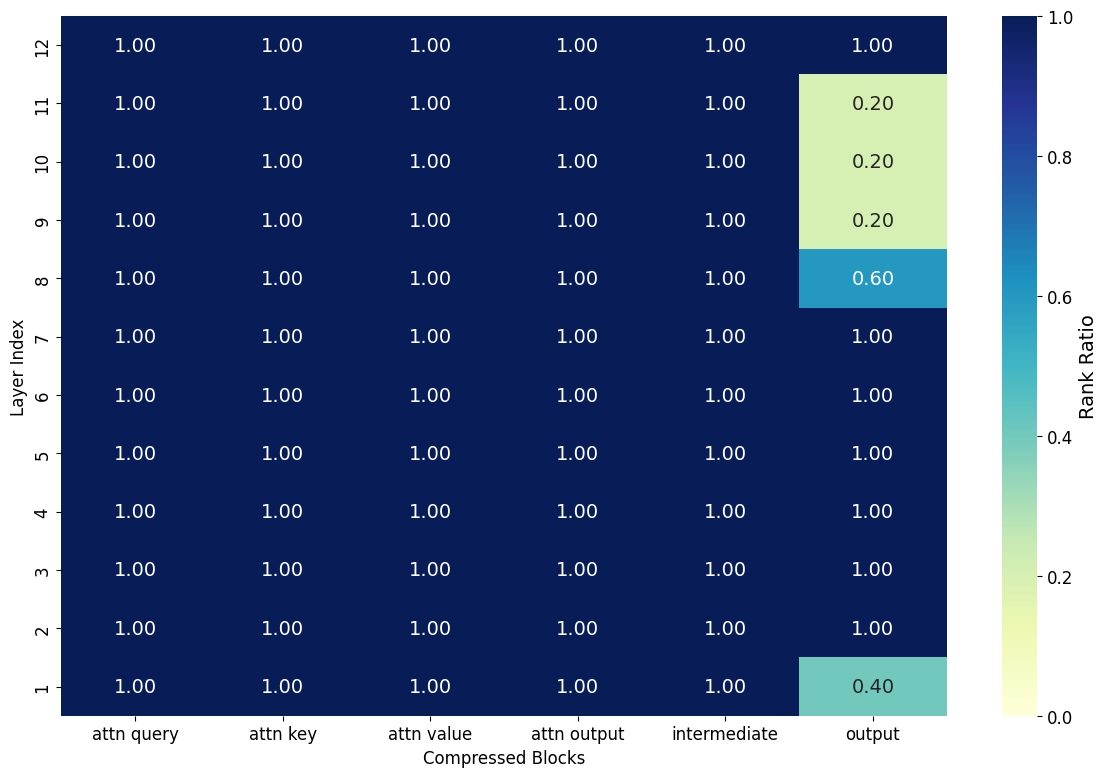

eval accuracy: 0.8245445829338447


eval accuracy: 0.8072866730584851
method : svd, alpha : 0.1, tau : 0.25 : 
accuracy : 0.9790697674418605
resulting parameters : 0.8975427391626913 




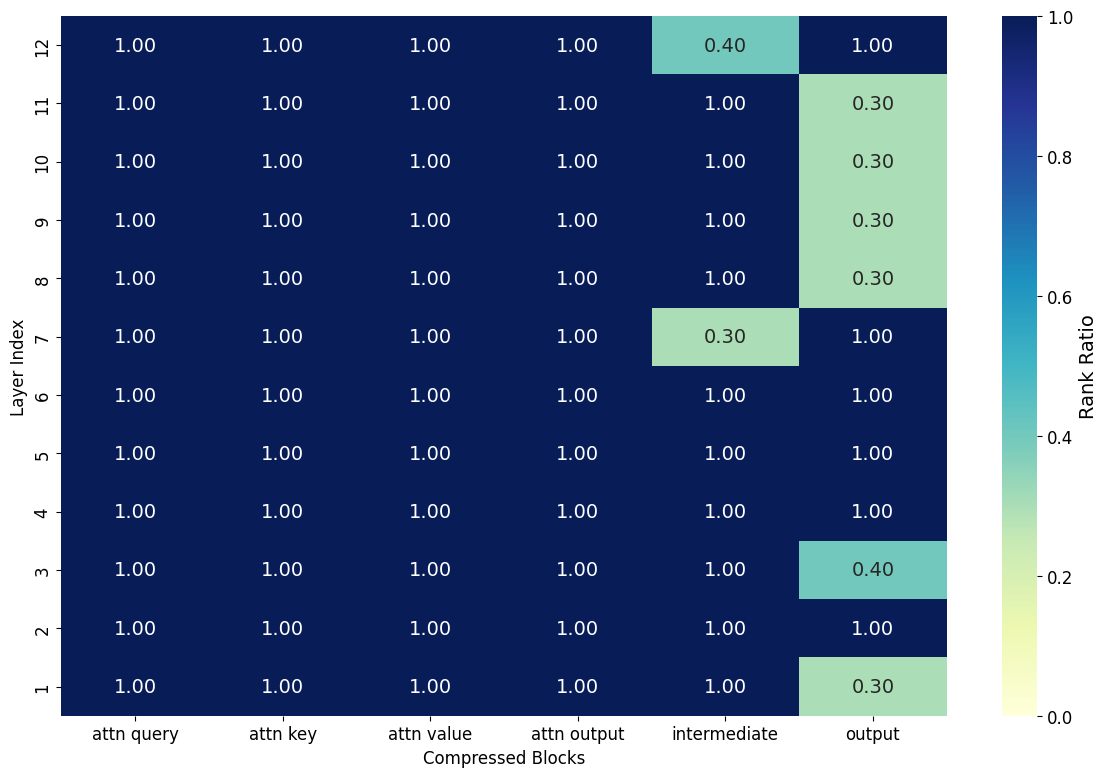

eval accuracy: 0.8245445829338447


eval accuracy: 0.7305848513902206
method : svd, alpha : 0.1, tau : 0.5 : 
accuracy : 0.886046511627907
resulting parameters : 0.8651206208832143 




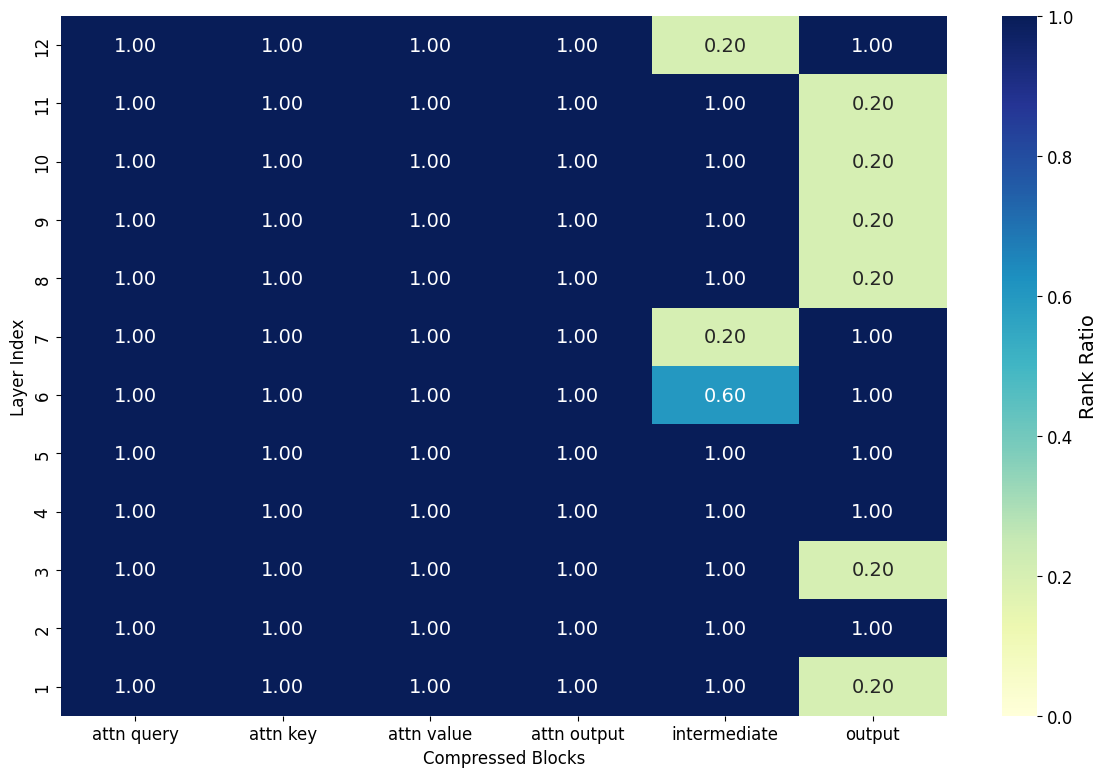

eval accuracy: 0.8245445829338447


eval accuracy: 0.6433365292425696
method : svd, alpha : 0.1, tau : 0.75 : 
accuracy : 0.780232558139535
resulting parameters : 0.8570536723714448 




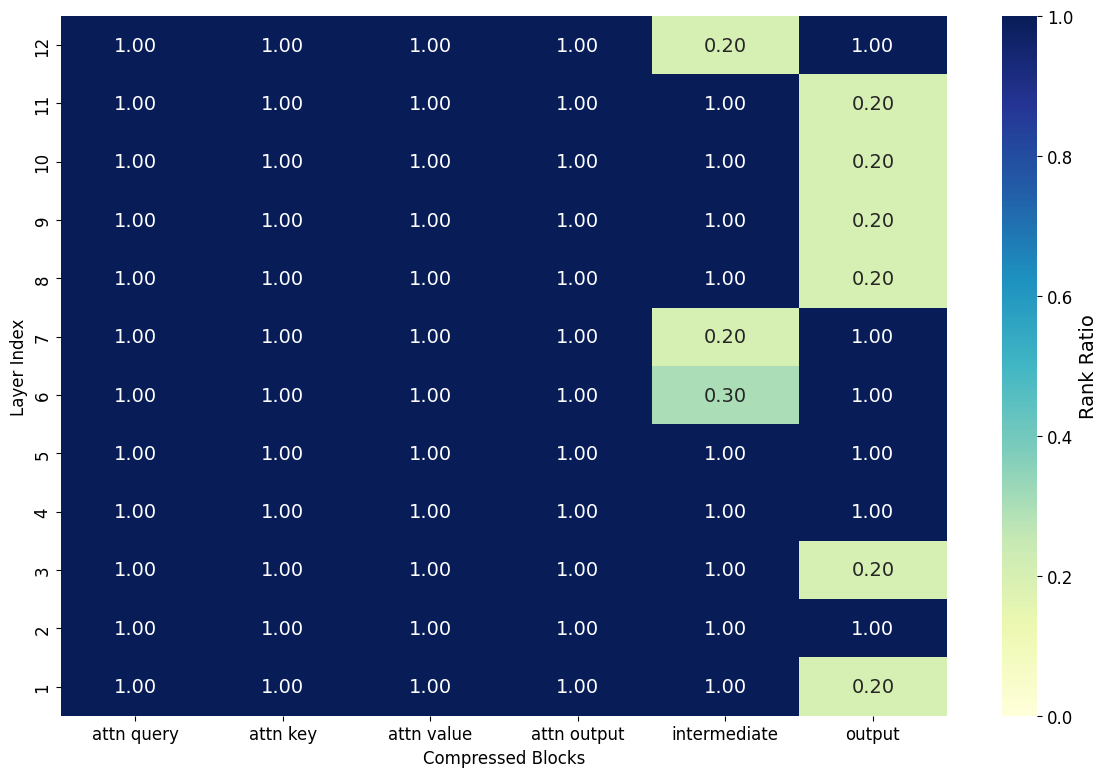

eval accuracy: 0.8245445829338447


eval accuracy: 0.8274209012464045
method : svd, alpha : 0.25, tau : 0.1 : 
accuracy : 1.0034883720930232
resulting parameters : 0.9217856731250177 




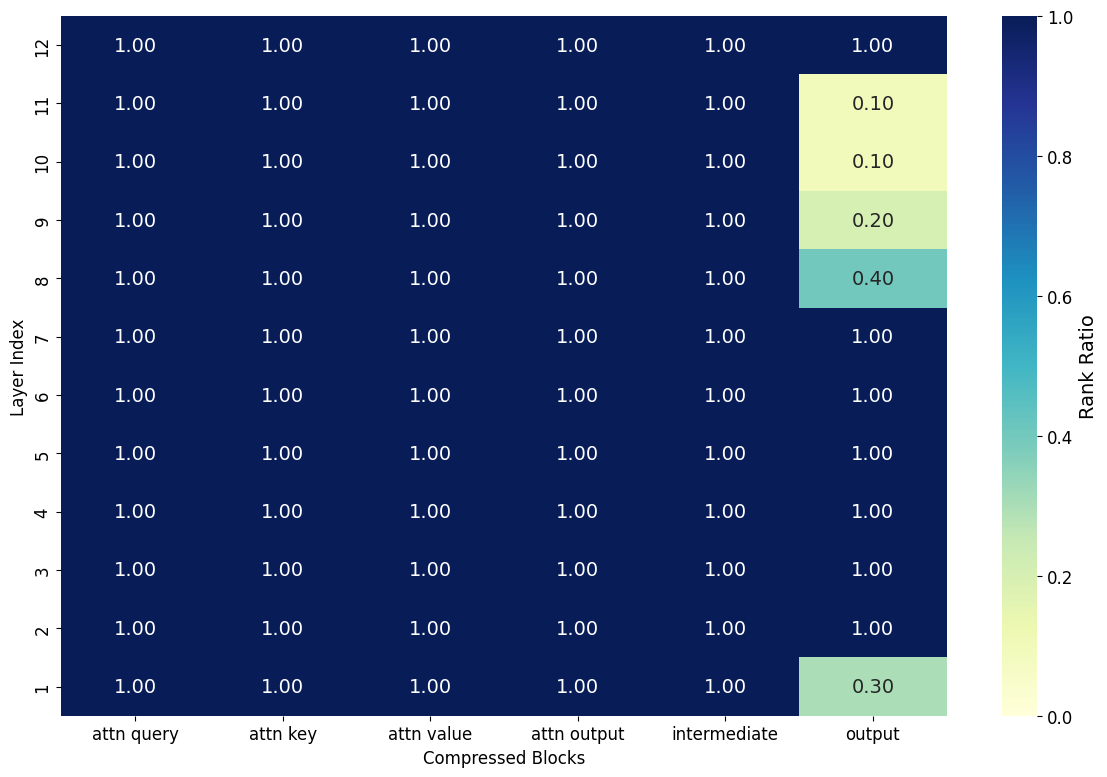

eval accuracy: 0.8245445829338447


eval accuracy: 0.8216682646212847
method : svd, alpha : 0.25, tau : 0.25 : 
accuracy : 0.9965116279069767
resulting parameters : 0.9055816287231155 




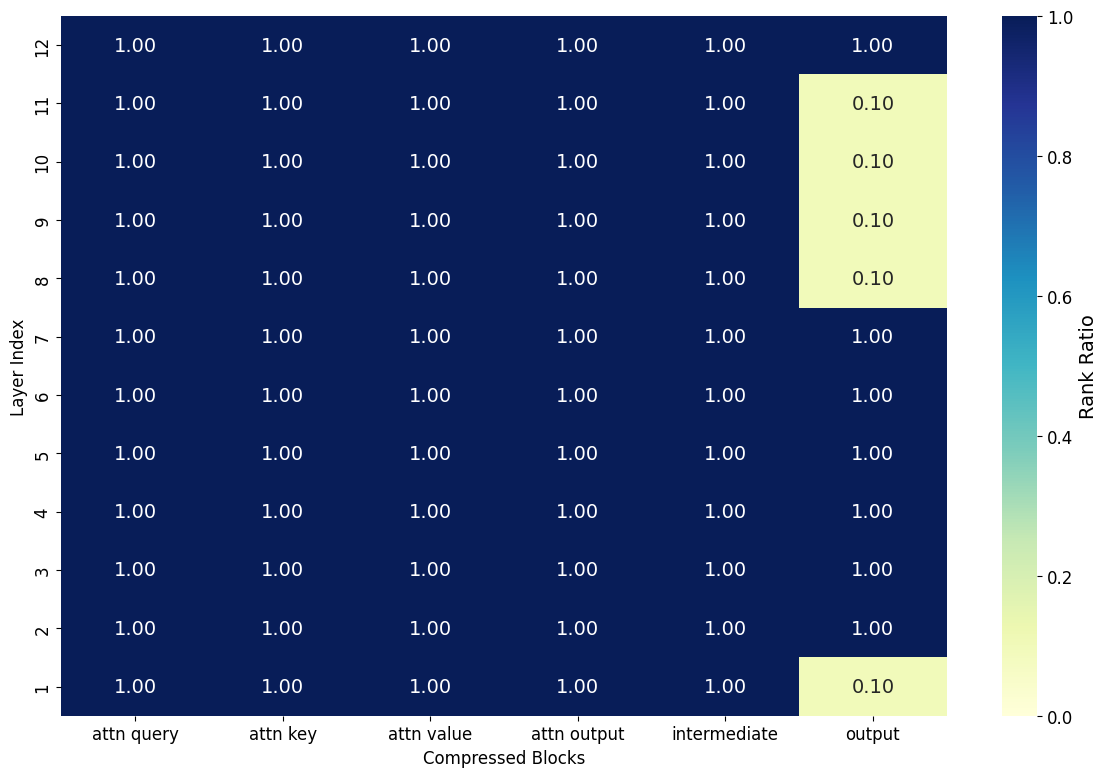

eval accuracy: 0.8245445829338447


eval accuracy: 0.7305848513902206
method : svd, alpha : 0.25, tau : 0.5 : 
accuracy : 0.886046511627907
resulting parameters : 0.8651206208832143 




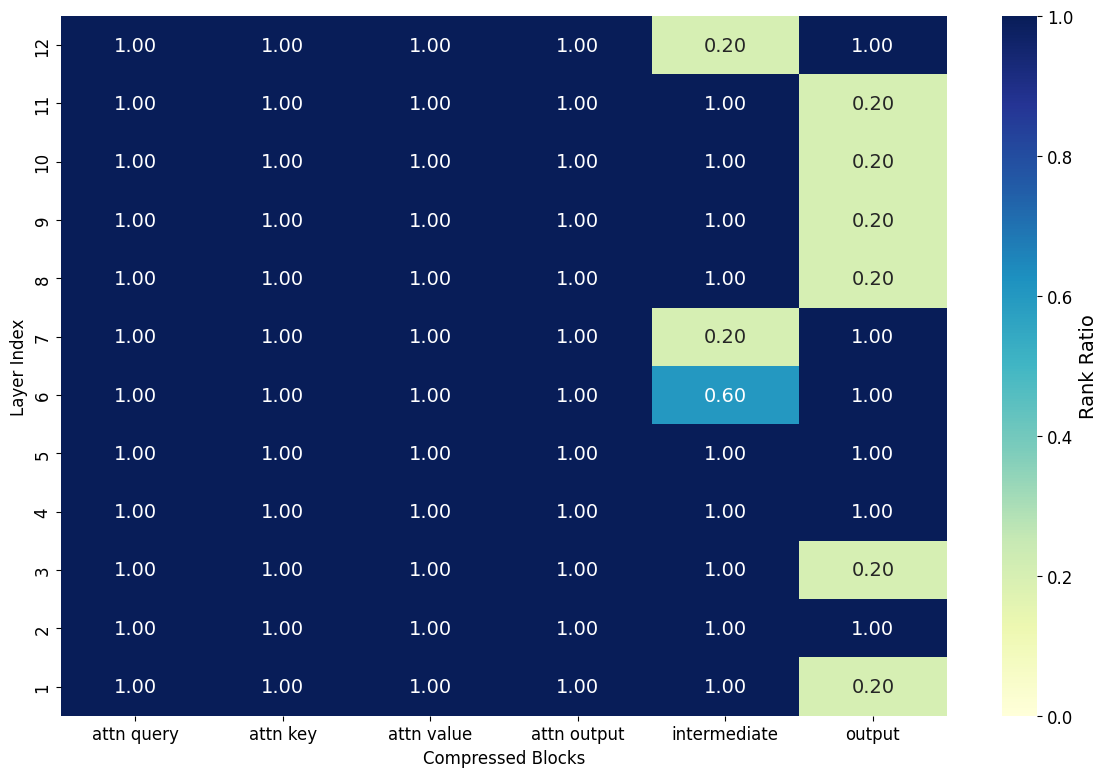

eval accuracy: 0.8245445829338447


eval accuracy: 0.6433365292425696
method : svd, alpha : 0.25, tau : 0.75 : 
accuracy : 0.780232558139535
resulting parameters : 0.8570536723714448 




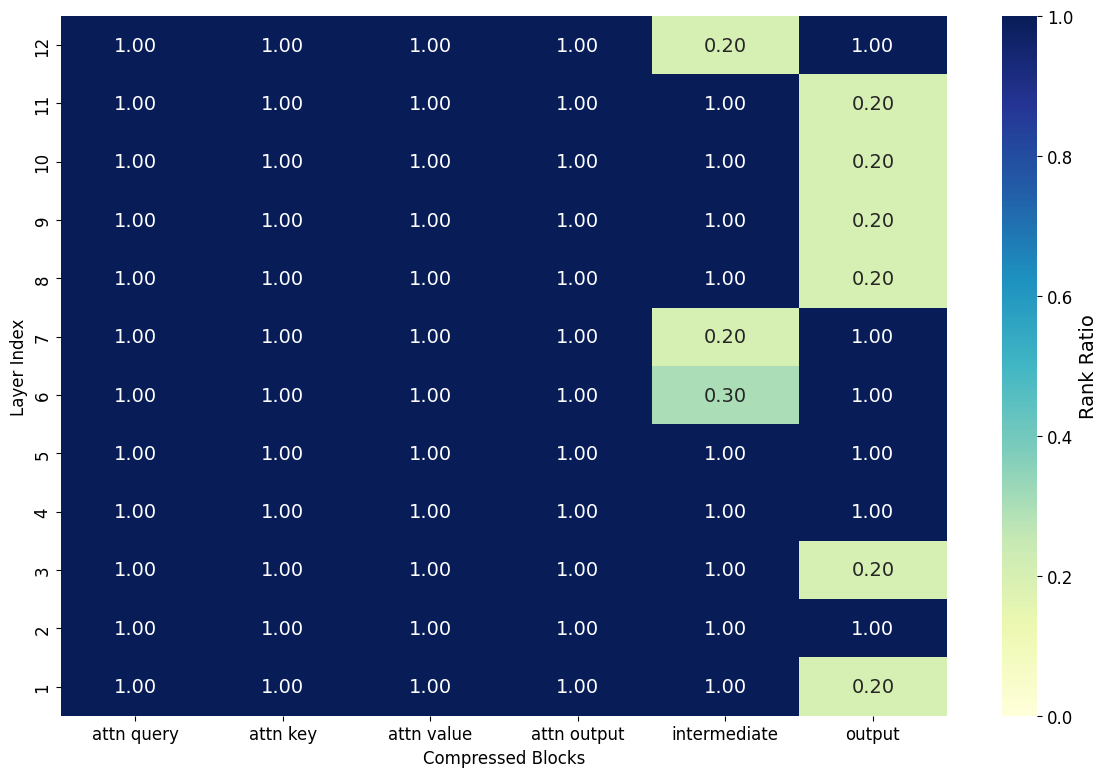

eval accuracy: 0.8245445829338447


eval accuracy: 0.8245445829338447
method : afm, alpha : 0.1, tau : 0.1 : 
accuracy : 1.0
resulting parameters : 0.9271961184971166 




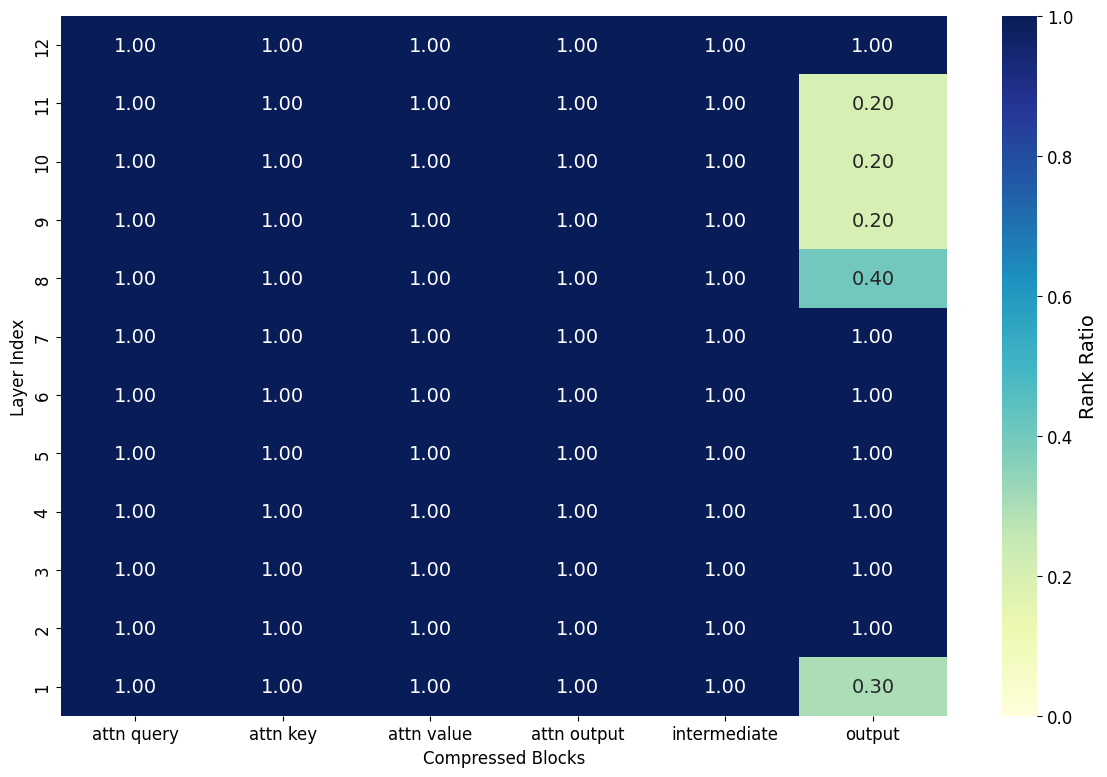

eval accuracy: 0.8245445829338447


eval accuracy: 0.8216682646212847
method : afm, alpha : 0.1, tau : 0.25 : 
accuracy : 0.9965116279069767
resulting parameters : 0.9028584581726802 




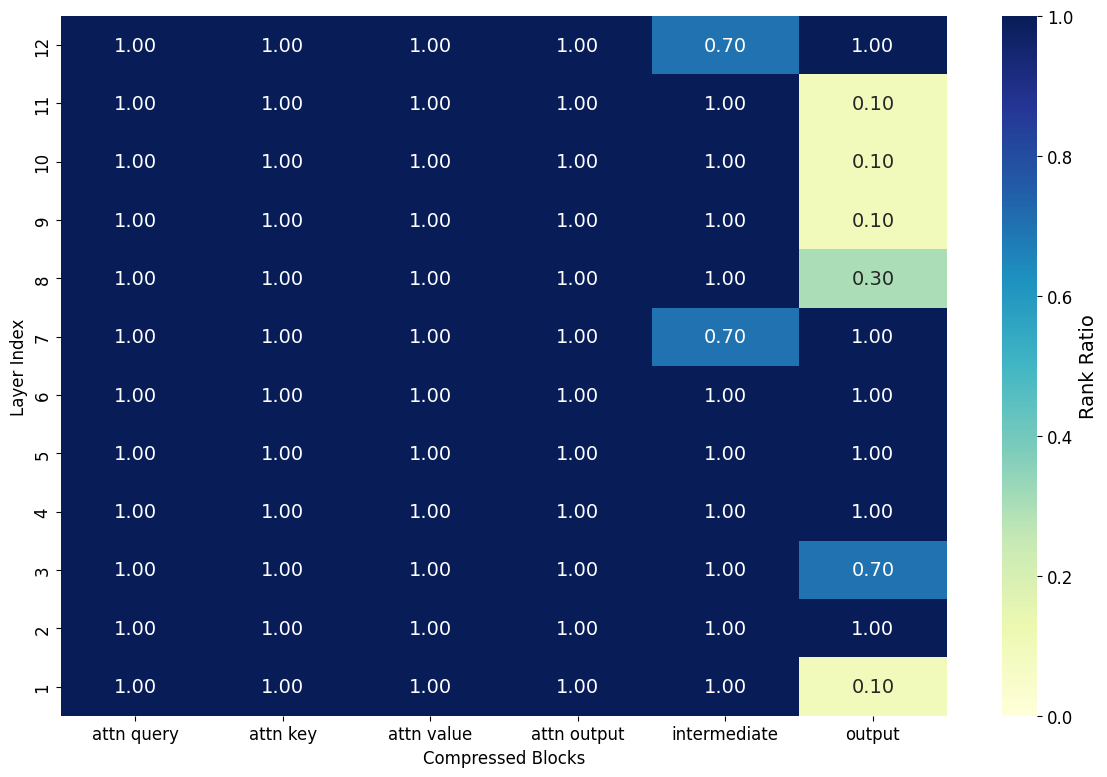

eval accuracy: 0.8245445829338447


eval accuracy: 0.725790987535954
method : afm, alpha : 0.1, tau : 0.5 : 
accuracy : 0.8802325581395348
resulting parameters : 0.859794991729277 




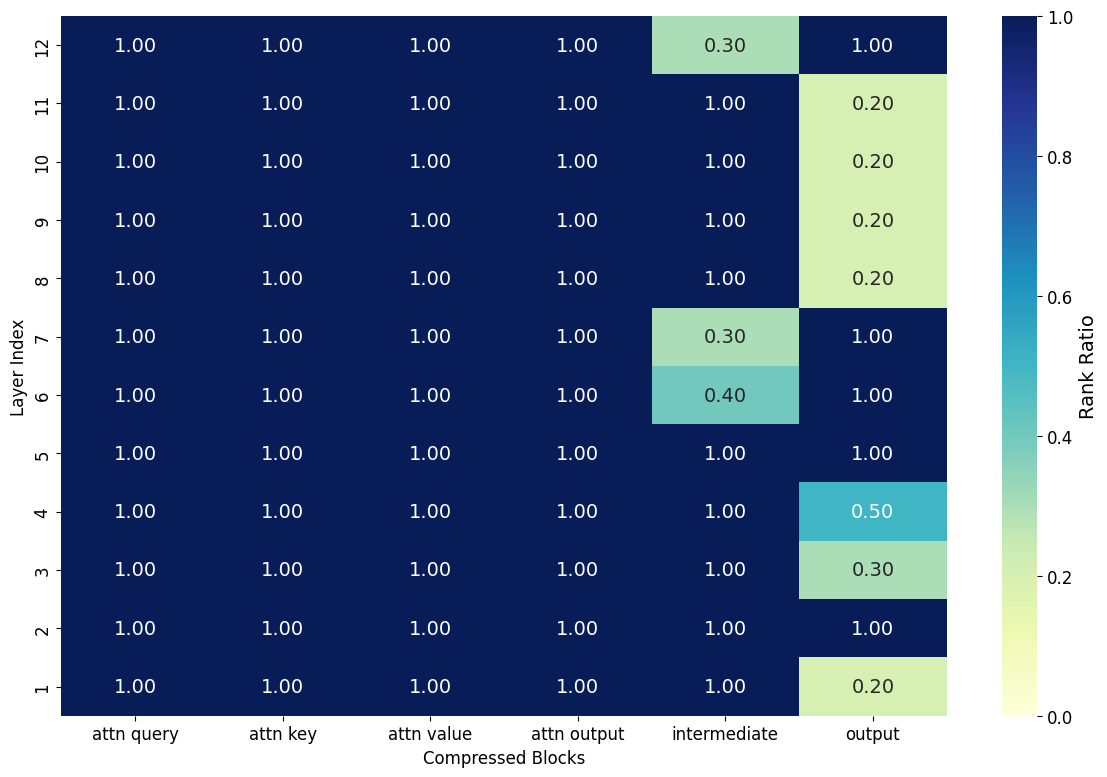

eval accuracy: 0.8245445829338447


eval accuracy: 0.6999041227229147
method : afm, alpha : 0.1, tau : 0.75 : 
accuracy : 0.8488372093023256
resulting parameters : 0.8462881048916672 




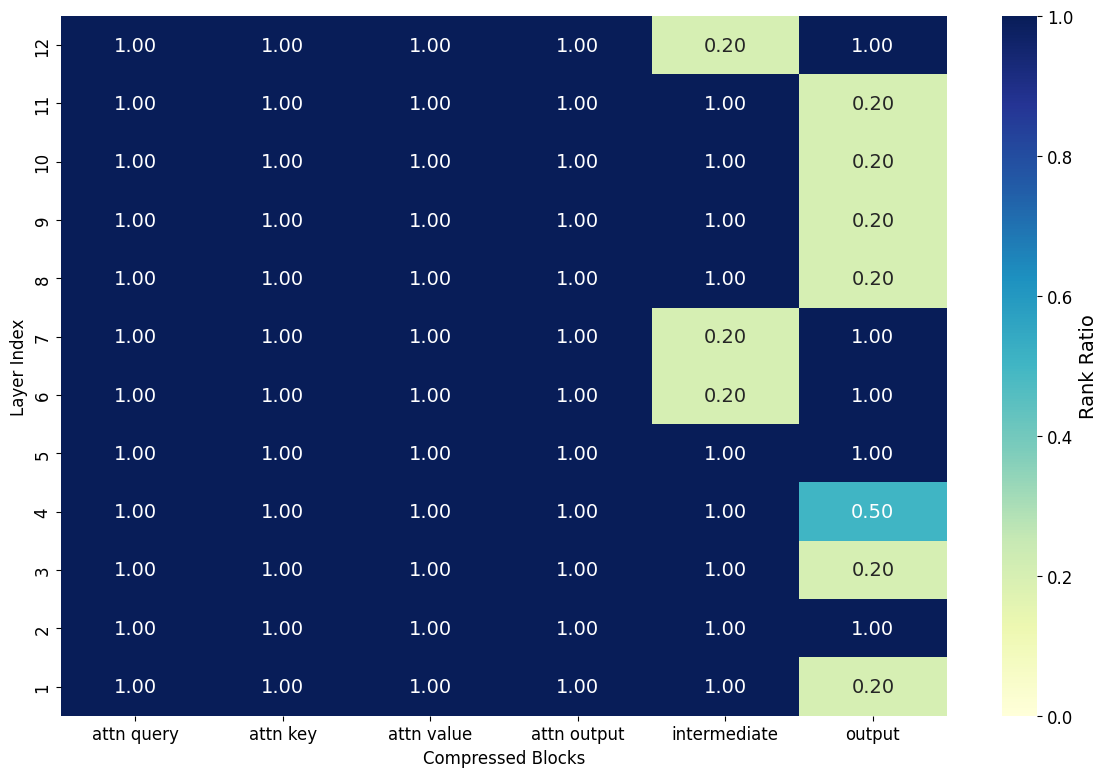

eval accuracy: 0.8245445829338447


eval accuracy: 0.822627037392138
method : afm, alpha : 0.25, tau : 0.1 : 
accuracy : 0.9976744186046511
resulting parameters : 0.9271526143352489 




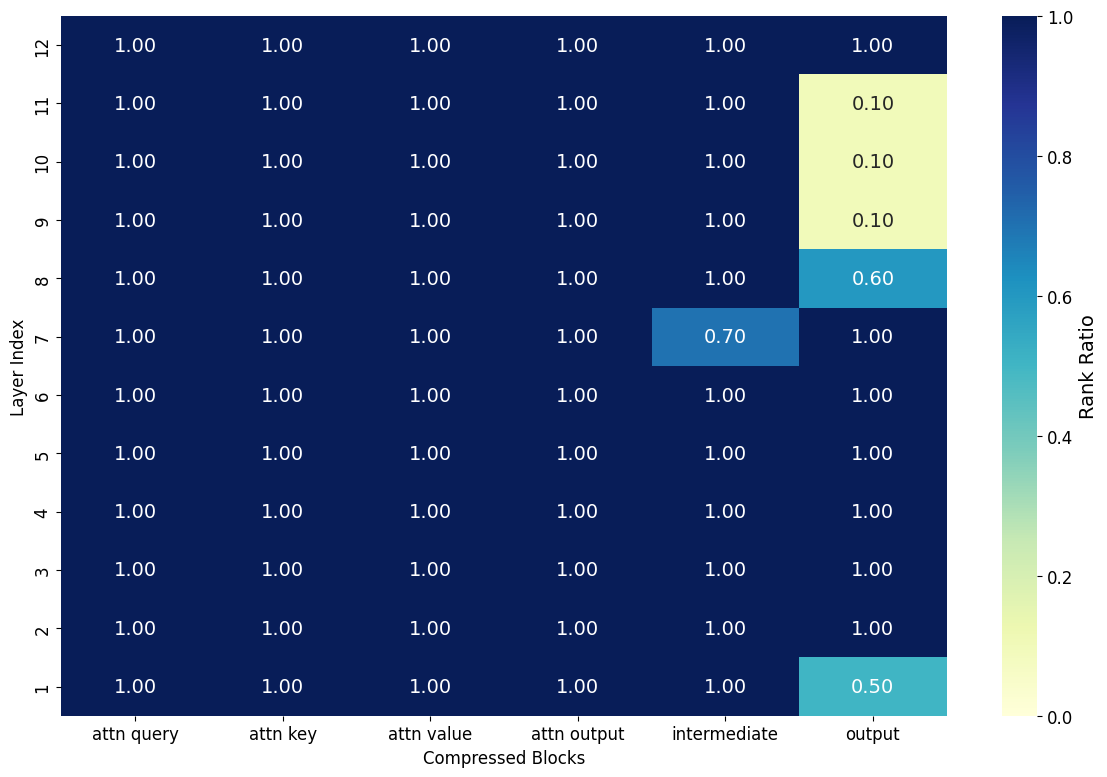

eval accuracy: 0.8245445829338447


eval accuracy: 0.8111217641418984
method : afm, alpha : 0.25, tau : 0.25 : 
accuracy : 0.9837209302325581
resulting parameters : 0.9001486594662453 




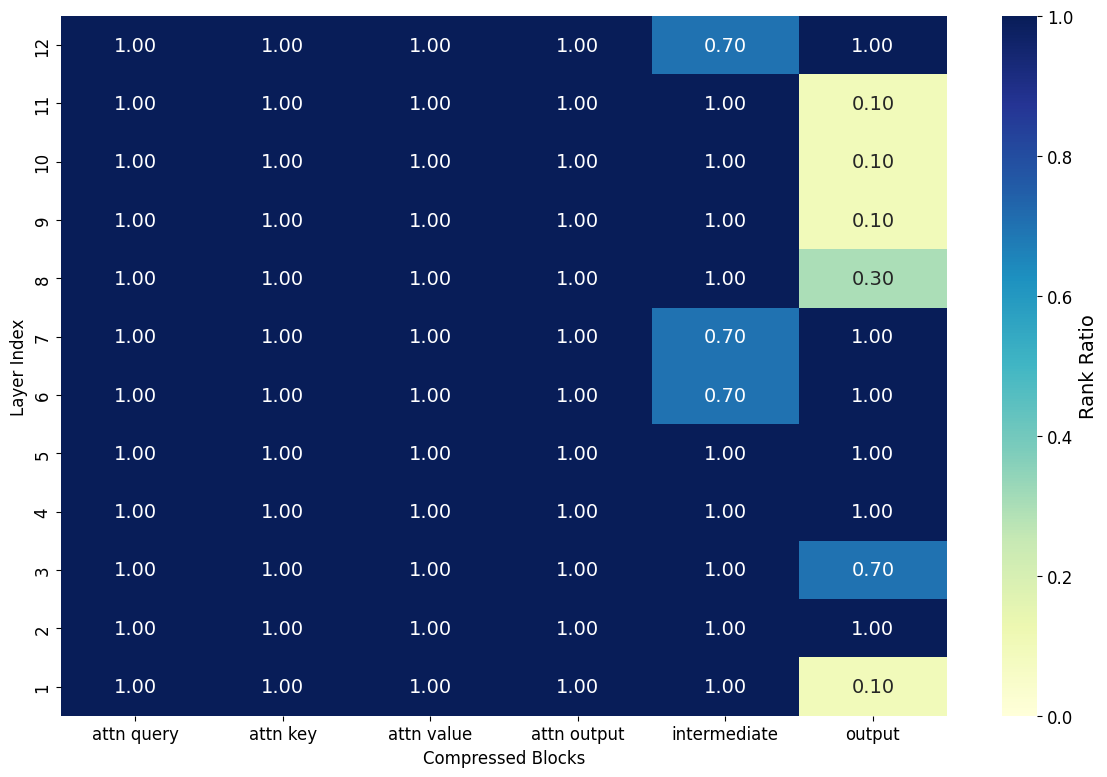

eval accuracy: 0.8245445829338447


eval accuracy: 0.725790987535954
method : afm, alpha : 0.25, tau : 0.5 : 
accuracy : 0.8802325581395348
resulting parameters : 0.859794991729277 




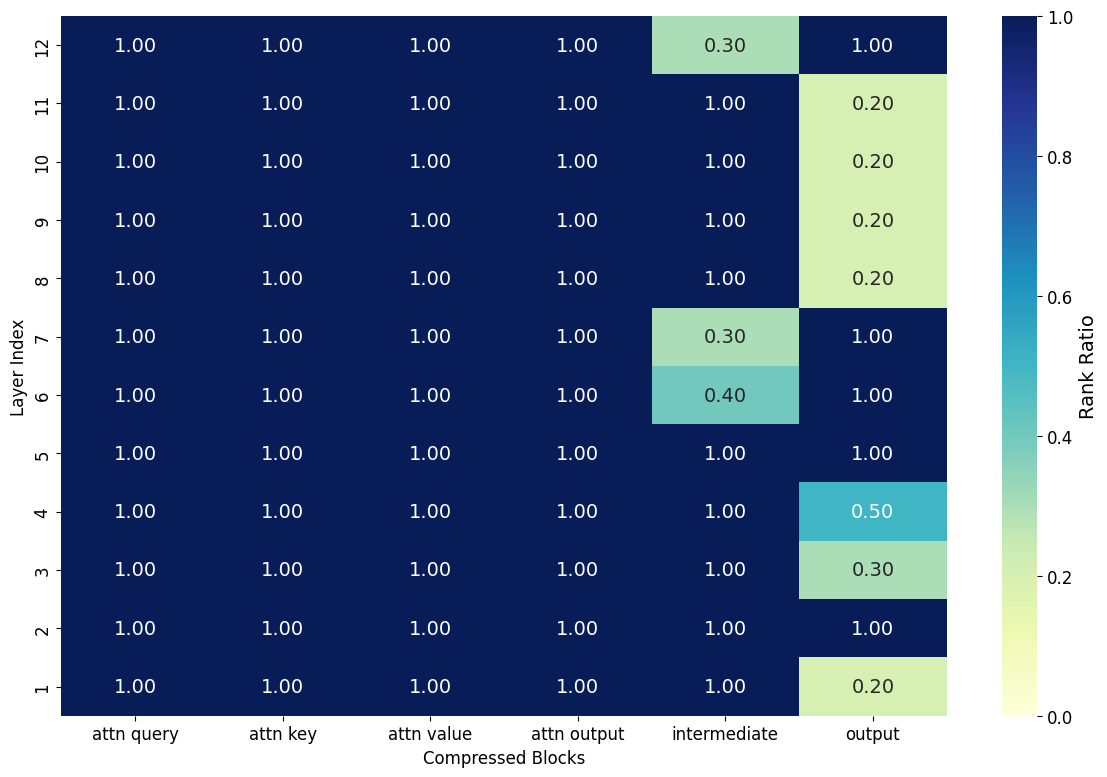

eval accuracy: 0.8245445829338447


eval accuracy: 0.6999041227229147
method : afm, alpha : 0.25, tau : 0.75 : 
accuracy : 0.8488372093023256
resulting parameters : 0.8462881048916672 




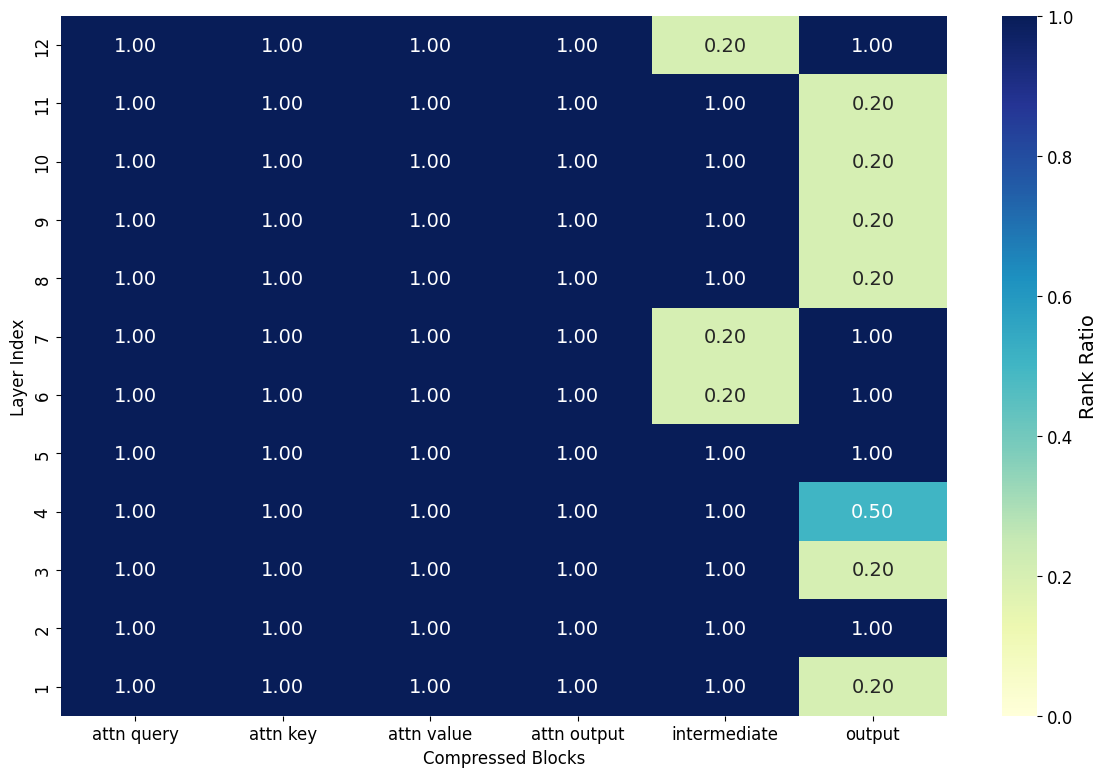

In [ ]:
#Classification Model
name = 'bert'
task = 'classification'
dataset_name = "cola"
split = "validation"
weight_path = f'/content/drive/MyDrive/MA2/Master Thesis/project/models/{name}/{name}_{dataset_name}.pth'
n_class = classification_dict[dataset_name]
tau_ = [0.1, 0.25, 0.5, 0.75]
alpha_ = [0.1, 0.25]
method_ = ['svd', 'afm']
lr_metric = 'effective_rank'

for method in method_ :
  for alpha in alpha_ :
    for tau in tau_ :

      my_Model = Model(name, task, weight_path)
      my_Model.tokenize_dataset(dataset_name, split, train_fraction=1, test_fraction=1)

      base_acc = ft.evaluate(my_Model, dataset_name, split=split)

      best_Model, best_rank_ratio_dict, res_param = knapsack_greedy_compression(my_Model,
                                                                    min_rank_ratios=np.linspace(0.1, 0.6, 6), max_rank_ratio=0.7, rank_ratio_step=0.1, output_threshold=tau,
                                                                    proxy_type = 'dataset', dataset_name = dataset_name, batch=16, seq_len=10, hidden_size=768, mu=0, sigma=1,
                                                                    complexity_metric = 'n_param', lr_metric = lr_metric, error_type='distillation', method=method, base_accuracy = base_acc, alpha=alpha
                                                                    )
      acc = ft.evaluate(best_Model, dataset_name, split=split)
      print(f'method : {method}, alpha : {alpha}, tau : {tau} : ')
      print(f'accuracy : {acc/base_acc}')
      print(f'resulting parameters : {res_param} \n\n')
      plot_rank_ratio_heatmap(best_rank_ratio_dict, '')

In [ ]:
#This data was reformated from the output of the above cell using DeepSeek
data = [
    {'method':'svd','alpha':0.1,'tau':0.1,'accuracy':1.0046511627906975,'params':0.9352539697707545},
    {'method':'svd','alpha':0.1,'tau':0.25,'accuracy':0.9790697674418605,'params':0.8975427391626913},
    {'method':'svd','alpha':0.1,'tau':0.5,'accuracy':0.886046511627907,'params':0.8651206208832143},
    {'method':'svd','alpha':0.1,'tau':0.75,'accuracy':0.780232558139535,'params':0.8570536723714448},
    {'method':'afm','alpha':0.1,'tau':0.1,'accuracy':1.0,'params':0.9271961184971166},
    {'method':'afm','alpha':0.1,'tau':0.25,'accuracy':0.9965116279069767,'params':0.9028584581726802},
    {'method':'afm','alpha':0.1,'tau':0.5,'accuracy':0.8802325581395348,'params':0.859794991729277},
    {'method':'afm','alpha':0.1,'tau':0.75,'accuracy':0.8488372093023256,'params':0.8462881048916672},
    {'method':'svd','alpha':0.25,'tau':0.1,'accuracy':1.0034883720930232,'params':0.9217856731250177},
    {'method':'svd','alpha':0.25,'tau':0.25,'accuracy':0.9965116279069767,'params':0.9055816287231155},
    {'method':'svd','alpha':0.25,'tau':0.5,'accuracy':0.886046511627907,'params':0.8651206208832143},
    {'method':'svd','alpha':0.25,'tau':0.75,'accuracy':0.780232558139535,'params':0.8570536723714448},
    {'method':'afm','alpha':0.25,'tau':0.1,'accuracy':0.9976744186046511,'params':0.9271526143352489},
    {'method':'afm','alpha':0.25,'tau':0.25,'accuracy':0.9837209302325581,'params':0.9001486594662453},
    {'method':'afm','alpha':0.25,'tau':0.5,'accuracy':0.8802325581395348,'params':0.859794991729277},
    {'method':'afm','alpha':0.25,'tau':0.75,'accuracy':0.8488372093023256,'params':0.8462881048916672},
]

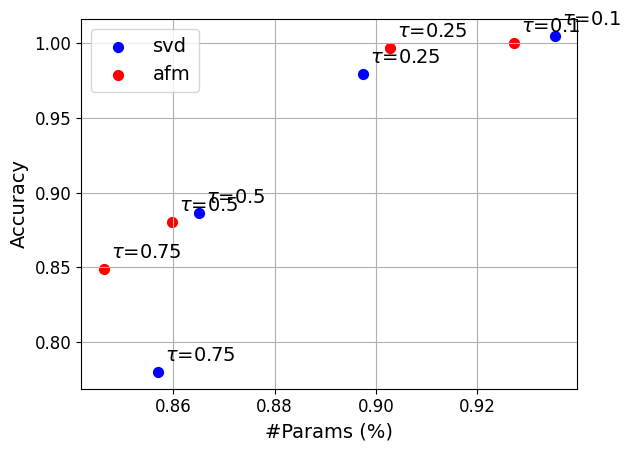

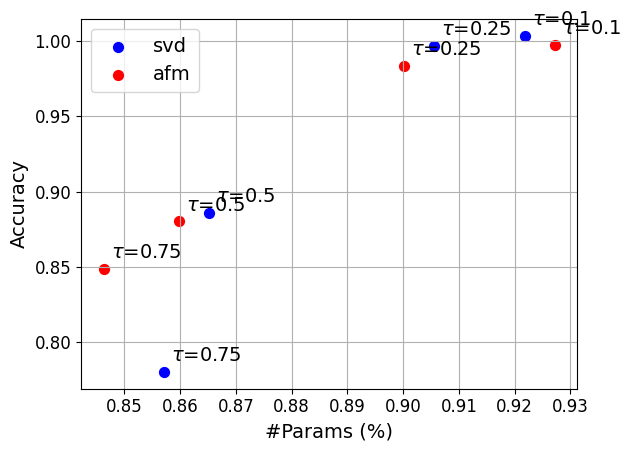

In [ ]:
df = pd.DataFrame(data)
colors = {'svd': 'blue', 'afm': 'red'}

for alpha_val in sorted(df['alpha'].unique()):
    subset = df[df['alpha'] == alpha_val]
    plt.figure()
    for method in ['svd', 'afm']:
        md = subset[subset['method'] == method]
        plt.scatter(md['params'], md['accuracy'],
                    color=colors[method], label=method, s=50)
        for _, row in md.iterrows():
            plt.annotate(
                rf"$\tau$={row['tau']}",
                (row['params'], row['accuracy']),
                textcoords="offset points",
                xytext=(5, 5),
                ha='left',
                va='bottom'
            )
    plt.xlabel('#Params (%)')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

plt.show()

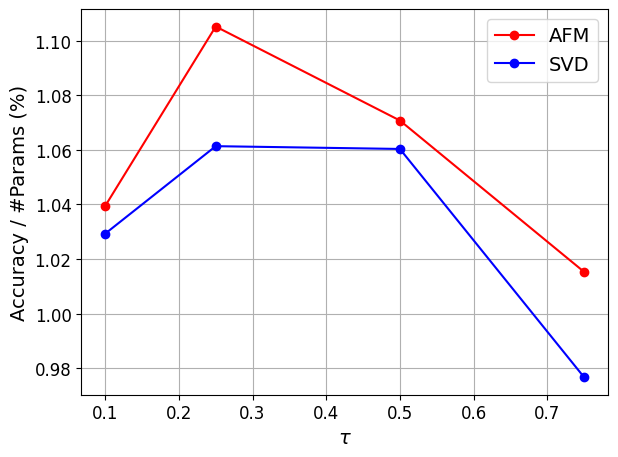

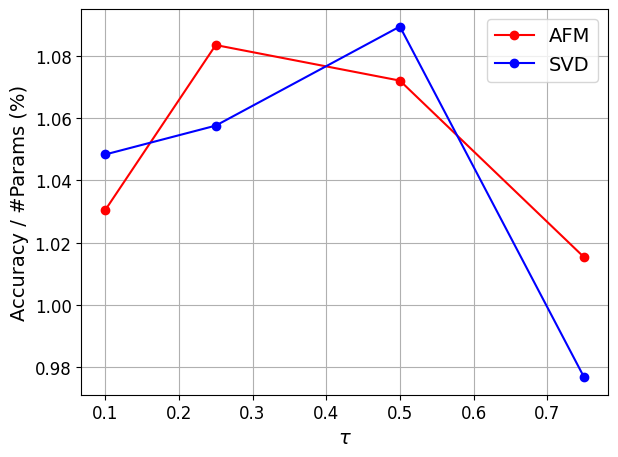

In [ ]:
#Extract x (tau) and y (accuracy/params) for a given alpha and method
def extract_xy(data, alpha, method):
    filtered = [d for d in data if d['alpha'] == alpha and d['method'] == method]
    filtered.sort(key=lambda x: x['tau'])  # Sort by tau
    x = [d['tau'] for d in filtered]
    y = [d['accuracy'] / d['params'] for d in filtered]
    return x, y

#Plot for each alpha
for alpha in [0.1, 0.25]:
    plt.figure()
    for method, color in [('afm', 'red'), ('svd', 'blue')]:
        x, y = extract_xy(data, alpha, method)
        plt.plot(x, y, marker='o', label=method.upper(), color=color)
    plt.xlabel(r'$\tau$')
    plt.ylabel('Accuracy / #Params (%)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()